 Diego Polar
# A1: Regression Model Development (Individual)


In [1]:
import pandas as pd #data science essentials
import numpy as np  #data science calculation tools and arrays
import matplotlib.pyplot as plt #visualization 
import seaborn as sns #enchance data visualization
import statsmodels.formula.api as smf #Regression modeling 
from sklearn.model_selection import train_test_split #calling train_test_split method
from sklearn.linear_model import LinearRegression # calling method for linear regression
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import confusion_matrix, classification_report #reporting tools 

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './birthweight_low.xlsx'


# reading the file into Python
birthweight = pd.read_excel(file)


# outputting the first ten rows of the dataset
birthweight.head(n = 10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,23,11.0,4,11.0,46,12.0,8,9,13,4,0,0,0,1,0,1,0,3600
1,23,16.0,3,10.0,50,12.0,3,8,1,1,1,0,1,0,0,1,0,3912
2,24,16.0,1,12.0,26,16.0,6,9,21,4,0,0,0,1,0,0,1,3090
3,25,14.0,3,12.0,33,12.0,9,9,12,7,1,0,1,0,0,1,0,3370
4,25,12.0,2,8.0,32,12.0,9,9,4,3,0,0,1,0,0,1,0,3827
5,26,12.0,1,10.0,24,12.0,8,9,6,8,1,0,0,1,0,0,1,2778
6,26,13.0,7,11.0,42,NaN,9,9,2,4,1,0,1,0,1,0,0,3170
7,26,11.0,1,12.0,44,12.0,9,9,10,4,1,0,1,0,0,1,0,3310
8,26,16.0,2,10.0,24,16.0,9,9,11,4,1,0,1,0,0,1,0,3730
9,26,12.0,1,12.0,32,12.0,9,9,6,0,1,0,1,0,0,1,0,3912


In [2]:
birthweight.shape #Exploring the number of observations and features

(352, 18)

In [3]:
print(f"""
Size of Original Dataset
------------------------
Observations: {birthweight.shape[0]}
Features:     {birthweight.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 352
Features:     18



In [4]:
birthweight.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    352 non-null    int64  
 1   meduc   349 non-null    float64
 2   monpre  352 non-null    int64  
 3   npvis   349 non-null    float64
 4   fage    352 non-null    int64  
 5   feduc   345 non-null    float64
 6   omaps   352 non-null    int64  
 7   fmaps   352 non-null    int64  
 8   cigs    352 non-null    int64  
 9   drink   352 non-null    int64  
 10  male    352 non-null    int64  
 11  mwhte   352 non-null    int64  
 12  mblck   352 non-null    int64  
 13  moth    352 non-null    int64  
 14  fwhte   352 non-null    int64  
 15  fblck   352 non-null    int64  
 16  foth    352 non-null    int64  
 17  bwght   352 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 49.6 KB


In [5]:
# Check for nulls value counts
birthweight.isnull().sum(axis = 0)

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [6]:
birthweight['meduc'] = birthweight['meduc'].fillna(birthweight['meduc'].mode()[0]) #imputing the mode in the variables with missing data
birthweight['npvis'] = birthweight['npvis'].fillna(birthweight['npvis'].mode()[0])
birthweight['feduc'] = birthweight['feduc'].fillna(birthweight['feduc'].mode()[0])

In [7]:
birthweight.isnull().any().any() #checking for any null values

False

In [8]:
birthweight.describe(include = 'number').round(2) #descriptive statistics of the dataset

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00
mean,38.93,13.53,2.02,13.52,40.60,13.55,7.95,8.88,10.76,5.53,0.55,0.33,0.36,0.30,0.40,0.33,0.27,3246.09
std,10.36,2.28,0.34,6.30,12.21,2.94,2.02,0.79,6.95,3.87,0.50,0.47,0.48,0.46,0.49,0.47,0.45,757.70
min,21.00,0.00,1.00,2.00,19.00,0.00,1.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,32.00,12.00,2.00,10.00,31.75,12.00,8.00,9.00,5.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2867.75
50%,37.00,13.00,2.00,12.00,39.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3349.00
75%,45.00,16.00,2.00,16.00,47.25,16.00,9.00,9.00,16.00,8.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3778.75
max,73.00,18.00,7.00,42.00,72.00,19.00,10.00,10.00,32.00,21.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


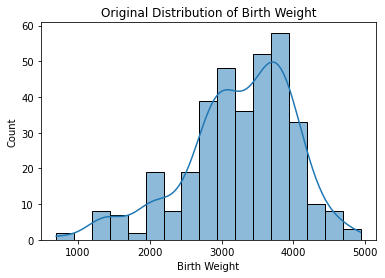

In [9]:
sns.histplot(data   = birthweight, #checking the distribution of the target variable
             x      = 'bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [10]:
# Creating a list of categorical variables 
cat_features = ['male',
                'mwhte',
                'mblck', 
                'moth',
                'fwhte',
                'fblck',
                'foth']

# For each feature variable in the features variable list, print out the unique
# categories and the value counts. 

for feature in cat_features: 
    
    print(f"""
    {'*'*60}
    
    Variable {feature} has these categories: 
    
{birthweight[feature].unique()}
    
    With the following value counts: 
    
{birthweight[feature].value_counts()}
    
    
    """)


    ************************************************************
    
    Variable male has these categories: 
    
[0 1]
    
    With the following value counts: 
    
1    192
0    160
Name: male, dtype: int64
    
    
    

    ************************************************************
    
    Variable mwhte has these categories: 
    
[0 1]
    
    With the following value counts: 
    
0    235
1    117
Name: mwhte, dtype: int64
    
    
    

    ************************************************************
    
    Variable mblck has these categories: 
    
[0 1]
    
    With the following value counts: 
    
0    224
1    128
Name: mblck, dtype: int64
    
    
    

    ************************************************************
    
    Variable moth has these categories: 
    
[1 0]
    
    With the following value counts: 
    
0    245
1    107
Name: moth, dtype: int64
    
    
    

    ************************************************************
    
    Varia

In [11]:
# creating a list of continuous features (including birth weight)
continuous_data = ['bwght', 'cigs', 'drink']


# developing a correlation matrix based on continuous features
birthweight_corr = birthweight[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with birth weight
birthweight_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght    1.00
cigs    -0.57
drink   -0.67
Name: bwght, dtype: float64

In [12]:
all_features = ['bwght', 
                'cigs', 
                'drink',
                'male',
                'mwhte',
                'mblck', 
                'moth',
                'fwhte',
                'fblck',
                'foth',
                'mage',
                'meduc',
                'monpre',
                'npvis',
                'fage',
                'feduc']
# developing a correlation matrix based on all features
birthweight_corr = birthweight[all_features].corr(method = 'pearson')


# filtering the results to only show correlations with birth weight
birthweight_corr.loc[ : , 'bwght'].round(decimals = 2).sort_values(ascending = False)

bwght     1.00
npvis     0.30
feduc     0.23
meduc     0.21
moth      0.10
foth      0.05
mblck     0.04
fblck     0.03
male      0.02
monpre    0.02
fwhte    -0.07
mwhte    -0.14
mage     -0.48
cigs     -0.57
fage     -0.58
drink    -0.67
Name: bwght, dtype: float64

In [13]:
#Preparing explanatory variable data
# Drop omaps, fmaps, and bwght (target)

use_var = ['cigs','drink','npvis','mage','meduc','monpre','npvis','fage','feduc',
           'mwhte','mblck','fwhte','fblck', 'foth','male','moth','foth']

explain_df = birthweight.loc[ : , use_var]

# preparing response variable data
target_df = birthweight.loc[ : , 'bwght']

# preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
                                     explain_df,
                                     target_df,
                                     test_size = 0.25,
                                     random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (264, 17)
y-side: 264


Testing Data
------------
X-side: (88, 17)
y-side: 88



In [14]:
#Scalling the data 
# INSTANTIATING a StandardScaler() object

scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(explain_df)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(explain_df)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00,352.00
mean,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.55,-1.43,-1.83,-1.73,-5.93,-3.02,-1.83,-1.77,-4.61,-0.71,-0.76,-0.81,-0.70,-0.61,-1.10,-0.66,-0.61
25%,-0.83,-0.66,-0.56,-0.67,-0.67,-0.05,-0.56,-0.73,-0.53,-0.71,-0.76,-0.81,-0.70,-0.61,-1.10,-0.66,-0.61
50%,0.03,-0.14,-0.24,-0.19,-0.23,-0.05,-0.24,-0.13,0.15,-0.71,-0.76,-0.81,-0.70,-0.61,0.91,-0.66,-0.61
75%,0.76,0.64,0.39,0.59,1.08,-0.05,0.39,0.55,0.83,1.42,1.32,1.23,1.43,1.63,0.91,1.51,1.63
max,3.06,4.01,4.53,3.29,1.96,14.80,4.53,2.58,1.85,1.42,1.32,1.23,1.43,1.63,0.91,1.51,1.63


In [15]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = explain_df.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(explain_df)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
cigs       48.102144
drink      14.896920
npvis      39.550846
mage      107.094388
meduc       5.203738
monpre      0.113346
npvis      39.550846
fage      148.665677
feduc       8.645112
mwhte       0.221906
mblck       0.231405
fwhte       0.239540
fblck       0.220945
foth        0.198347
male        0.247934
moth        0.211575
foth        0.198347
dtype: float64


Dataset AFTER Scaling
----------------------
cigs      1.0
drink     1.0
npvis     1.0
mage      1.0
meduc     1.0
monpre    1.0
npvis     1.0
fage      1.0
feduc     1.0
mwhte     1.0
mblck     1.0
fwhte     1.0
fblck     1.0
foth      1.0
male      1.0
moth      1.0
foth      1.0
dtype: float64



In [16]:
#new scaled df
x_scaled_df.head(n=5)

,cigs,drink,npvis,mage,meduc,monpre,npvis,fage,feduc,mwhte,mblck,fwhte,fblck,foth,male,moth,foth
0,0.322776,-0.395997,-0.400233,-1.539234,-1.108382,5.889928,-0.400233,0.442696,-0.527551,-0.705601,-0.755929,-0.812636,1.426353,-0.612372,-1.095445,1.513182,-0.612372
1,-1.407435,-1.173268,-0.559242,-1.539234,1.083475,2.919649,-0.559242,0.770757,-0.527551,-0.705601,1.322876,-0.812636,1.426353,-0.612372,0.912871,-0.660859,-0.612372
2,1.476250,-0.395997,-0.241224,-1.442603,1.083475,-3.020909,-0.241224,-1.197609,0.832874,-0.705601,-0.755929,-0.812636,-0.701089,1.632993,-1.095445,1.513182,1.632993
3,0.178592,0.381275,-0.241224,-1.345972,0.206732,2.919649,-0.241224,-0.623502,-0.527551,-0.705601,1.322876,-0.812636,1.426353,-0.612372,0.912871,-0.660859,-0.612372
4,-0.974882,-0.655087,-0.877261,-1.345972,-0.670011,-0.050630,-0.877261,-0.705518,-0.527551,-0.705601,1.322876,-0.812636,1.426353,-0.612372,-1.095445,-0.660859,-0.612372


In [17]:
#Preparing training and testing data for scaled dataset
explain_df = x_scaled_df.loc[ : , use_var]

# preparing response variable data
target_df = birthweight.loc[ : , 'bwght']

# preparing training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
                                     explain_df,
                                     target_df,
                                     test_size = 0.25,
                                     random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (264, 21)
y-side: 264


Testing Data
------------
X-side: (88, 21)
y-side: 88



In [18]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test)


# SCORING the results
print('OLS Training Score :', lr.score(x_train, y_train).round(4))
print('OLS Testing Score  :', lr.score(x_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train, y_train).round(4) # using R-square
lr_test_score  = lr.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.5829
OLS Testing Score  : 0.6305
OLS Train-Test Gap : 0.0476


In [19]:
bwght_test = pd.concat([x_test, y_test], axis = 1)

lm_best = smf.ols(formula = """bwght ~ cigs+drink+npvis+mage+meduc+monpre+npvis+fage+feduc+mwhte+mblck+fwhte+fblck+foth+male+moth+foth""",
                  data = birthweight)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     40.07
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.60e-60
Time:                        21:38:47   Log-Likelihood:                -2668.7
No. Observations:                 352   AIC:                             5365.
Df Residuals:                     338   BIC:                             5419.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2344.1364    173.994     13.473      0.0

In [20]:
bwght_test = pd.concat([x_test, y_test], axis = 1)

lm_best = smf.ols(formula = """bwght ~  cigs+drink+npvis+npvis+fage+mwhte+mblck+fwhte+fblck+foth+moth+foth""",
                  data = birthweight) #dropping variables not significant


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     64.73
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           5.62e-64
Time:                        21:38:49   Log-Likelihood:                -2670.9
No. Observations:                 352   AIC:                             5360.
Df Residuals:                     343   BIC:                             5395.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2575.4454     72.221     35.660      0.0

In [21]:
use_var2 = ['cigs','drink','npvis','npvis','fage',
           'mwhte','mblck','fwhte','fblck', 'foth','moth','foth']

explain_df2 = birthweight.loc[ : , use_var2]

# preparing response variable data
target_df2 = birthweight.loc[ : , 'bwght']

# preparing training and testing sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(
                                     explain_df2,
                                     target_df2,
                                     test_size = 0.25,
                                     random_state = 219)


In [22]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train2, y_train2)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test2)


# SCORING the results
print('OLS Training Score :', lr.score(x_train2, y_train2).round(4))
print('OLS Testing Score  :', lr.score(x_test2, y_test2).round(4))


# saving scoring data for future use
lr_train_score2 = lr.score(x_train2, y_train2).round(4) # using R-square
lr_test_score2  = lr.score(x_test2, y_test2).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score2 - lr_test_score2).round(4))
lr_test_gap2 = abs(lr_train_score2 - lr_test_score2).round(4)

OLS Training Score : 0.5753
OLS Testing Score  : 0.6564
OLS Train-Test Gap : 0.0811


In [23]:
# importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=1)

# FITTING to the training data
knn_fit = knn_classifier.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_classifier.predict(x_test)

#predict

pred_y = knn_classifier.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_classifier.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_classifier.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_classifier.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_classifier.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : 0.1023
KNN Train-Test Gap: 0.8977


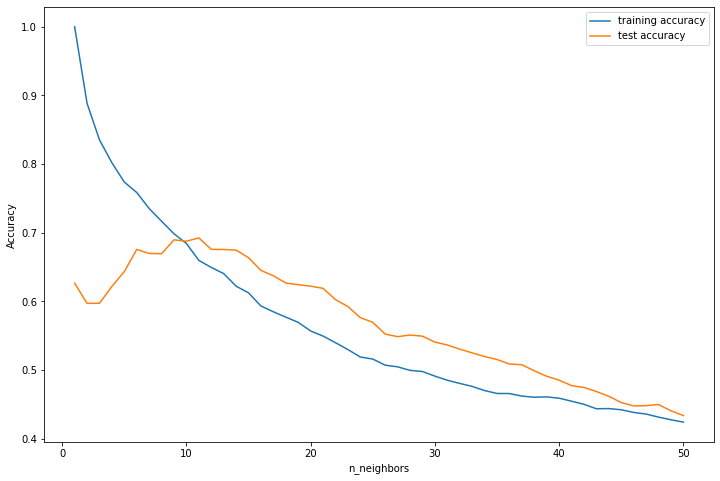

In [24]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(x_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(x_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show() #showing the visualization

In [25]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 11


In [26]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm   = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(x_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(x_test)



# SCORING the results
print('KNN Training Score:', knn_opt.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_opt.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(x_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_opt_score_train - knn_opt_score_test).round(4))
knn_opt_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(4)

KNN Training Score: 0.6597
KNN Testing Score : 0.6926
KNN Train-Test Gap: 0.0329


In [27]:
# Evaluating the model 
print(confusion_matrix(y_test, pred_y))
print(classification_report(y_test, pred_y))

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         697       0.00      0.00      0.00         0
         733       0.00      0.00      0.00         1
        1290       0.50      1.00      0.67         1
        1490       1.00      1.00      1.00         1
        1718       0.00      0.00      0.00         1
        1720       0.00      0.00      0.00         0
        1956       1.00      1.00      1.00         3
        1984       0.00      0.00      0.00         1
        2050       1.00      1.00      1.00         4
        2068       0.00      0.00      0.00         0
        2148       0.00      0.00      0.00         1
        2215       0.00      0.00      0.00         0
        2530       0.00      0.00      0.00         0
        2580       0.00      0.00      0.00         1
        2590       0.00      0.00      0.00         0
        2630   

C:\Users\polar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\polar\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [28]:
# Comparing K value with error rate
# placeholder
error = []

# K value ranging between 1 and 40 

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred_x = knn.predict(x_test)
    error.append(np.mean(pred_x != y_test))
    
    
# the code will run the loop from 1 to 40. In each iteration, the mean 
# error for the predicted value of the test set is calculated and the result appended to 
# error list 

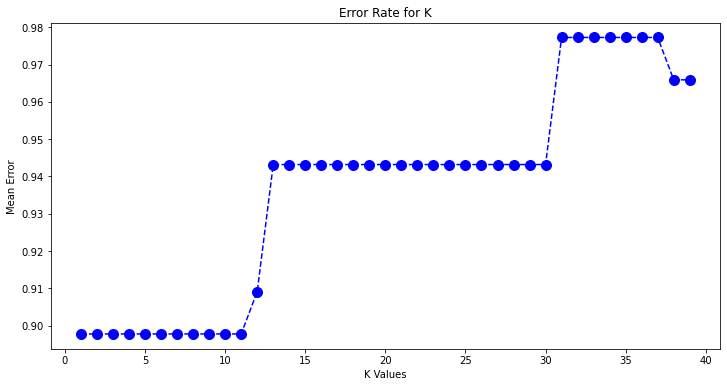

In [29]:
# plotting the error
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor='blue', markersize = 10)
plt.title('Error Rate for K')
plt.xlabel('K Values')
plt.ylabel('Mean Error')
plt.show()

In [30]:
import sklearn.linear_model # linear models
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.579
Lasso Testing Score  : 0.6547
Lasso Train-Test Gap : 0.0757


In [31]:
print(f"""

SUMMARY ON THE MODELS

OLS    Features     Train Score       Test Score       Train Gap
----------------      ---------     ----------       ----------
OLS     17             {lr_train_score}           {lr_test_score}         {lr_test_gap}
OLS2     10             {lr_train_score2}           {lr_test_score2}         {lr_test_gap2}
(Only signficant variables on OLS2)

KNN Model             K             Train Score      Test Score       Train Gap
----------------      ---------     ----------       ----------       ----------
Standardized          {opt_neighbors}            {knn_opt_score_train}           {knn_opt_score_test}         {knn_opt_test_gap}

Lasso     Train Score       Test Score       Train Gap
----------------      ---------     ----------       ----------
Lasso      {lasso_train_score}           {lasso_test_score}                {lasso_test_gap}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'KNN Model'],
           
    
    'Training' : [lr_train_score,
                  lasso_train_score,
                  knn_opt_score_train],
           
    
    'Testing'  : [lr_test_score,
                  lasso_test_score,
                  knn_opt_score_test],
                    
    
    'Train-Test Gap' : [lr_test_gap,
                        lasso_test_gap,
                        knn_opt_test_gap],
                    }


# sending model results to a dataframe
model_performance = pd.DataFrame(model_performance)



# checking the results
print(model_performance)


print(f'''\nThe best model for this dataset is the''') 
if max(lr_test_score, lasso_test_score, knn_opt_score_test,lr_test_score2) == lasso_test_score and lasso_test_gap < 0.05:
    print(f'''Lasso Model with a Test score of {lasso_test_score}''')
elif  max(lr_test_score, knn_opt_score_test,lr_test_score2) == lr_test_score and lr_test_gap < 0.05:
    print(f'''OLS Model with a Test score of {lr_test_score}''')
elif  max(knn_opt_score_test,lr_test_score2) == lr_test_score2 and lr_test_gap2 < 0.05:
    print(f'''OLS Model with a Test score of {lr_test_score2}''')
elif  knn_opt_test_gap < 0.05:
    print(f'''KNN Model with a Test Score of {knn_opt_score_test}''')
else: print ('The models used to analyze are not ideal.')
#use of ifs statements to determine the best model overall



SUMMARY ON THE MODELS

OLS    Features     Train Score       Test Score       Train Gap
----------------      ---------     ----------       ----------
OLS     17             0.5829           0.6305         0.0476
OLS2     10             0.5753           0.6564         0.0811
(Only signficant variables on OLS2)

KNN Model             K             Train Score      Test Score       Train Gap
----------------      ---------     ----------       ----------       ----------
Standardized          11            0.6597           0.6926         0.0329

Lasso     Train Score       Test Score       Train Gap
----------------      ---------     ----------       ----------
Lasso      0.579           0.6547                0.0757


  Model Type  Training  Testing  Train-Test Gap
0        OLS    0.5829   0.6305          0.0476
1      Lasso    0.5790   0.6547          0.0757
2  KNN Model    0.6597   0.6926          0.0329

The best model for this dataset is the
KNN Model with a Test Score of 0.6926
